# **Анализа на временски серии - crypto**

Изработиле:

**Иван Јорданов 181122**

**Теодора Спасовска 181090** 
***

# **Преглед на Facebook Prophet и Neural Prophet**


# Facebook Prophet

### Преглед

Facebook Prophet е алгоритам со отворен код за генерирање на модели со временски серии. Алгоритмот e особено корисен за моделирање на временски серии кои содржат повеќе "seasonalities". 


Facebook Prophet е лесен за користење, брз и не се соочува со многу предизвици со кои се соочуваат некои други видови алгоритми за моделирање на временски серии. Особено корисен е за множества на податоци со missing values.

Prophet има многу брзо добри перформанси, во споредба со времето на развој. 


Oвозможува да се предвидат временски серии без речиси никакво feature engineering и добро ниво на перформанси, во рекордно време.

### Настанување

Facebook Prophet е алатка создадена од Facebook за да им помогне на вработените кои работат со податоци, но можеби не се добро упатени во различните техничи за предвидување да се спават со предизвикот на прогнозирање. Таа била развиена за аналитичарите кои треба да вршат прогнозирање да бидат што е можно поефективни без опширно познавање на доменот на темата.

### Trend

Голема предност на Facebook Prophet во споредба со авторегресивните модели (пример ARIMA) е тоа што на Prophet не бара стационарни временски серии, туку тренд компонентата се генерира природно.

Трендот може правилно да се процени без никакви надворешни податоци.

Некои работи на кои што треба да се внимава за да имаме стабилни разултати и перформанси се:

1. Changepoints

  Наоѓање на соодветната вредност за changepoint_prior_scale е есенцијално, бидејќи овој параметар ја одредува флексибилноста на трендот. Колку е повисока, толку е пофлексибилен трендот.

2. Outliers

 Во официјалната документација на Prophet се препорачува да се избришат сите outliers.


### Моделот

Во основа Facebook Prophet претставува збир на 3 временски функции и грешката.



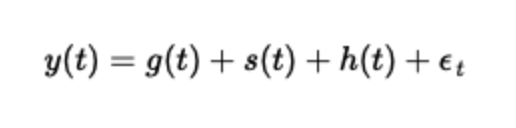


Кадешто g(t) е growth function, s(t) е seasonality function, h(t) е holiday/event function и e_t е грешката.



#### Growth Function

Функцијата на раст го моделира целокупниот тренд на податоците. Идејата на Facebook prophet е дека трендот на раст може да биде присутен во сите точки во податоците или може да се промени во таканаречени "changepoints" или точки на промена. 

Точките на промена се моменти во податоците кадешто податоците ја менуваат својата насока. Prophet може автоматски да ги детектира, но можеме и ние рачно да ги наместиме. Исто така, можеме и да ја прилагодиме моќноста која што ја имаат точките на промена врз функцијата на раст, и количината на податоци земени во предвид при автоматското откривање на точките на промена.

Главно функцијата на раст има 3 опции:

1. Линеарен раст: 
Ова е стандардната опција за Prophet. Користи збир со делчиња од линеарни равенки со различни наклони помеѓу точките на промена. 

    Кога се користи линеарниот раст изгледа вака:

    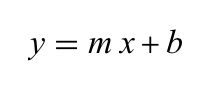

    Така што m е наклонот и b е поместувањето. Тие на секоја точка на промена ја менуваат вредноста.

2. Логистички раст:
Оваа опција е особено корисна кога временската серија има cap или floor, кадешто вредностите кои ги моделираме стануваат заситени и не можат да ја надминат максималната или минималната вредност. Кога се користи логистичкиот раст равенката изгледа вака:

  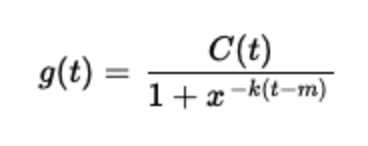

  Така што носивоста (C) ќе варира како функцијата за време, a стапката на раст (k) и поместувањето (m)  ќе ја менуваат вредноста на секоја точка на промена.

3. Рамен раст:
Рамниот тренд се користи кога нема раст со текот на времето, но сепак може да има seasonality. Ако се избере оваа опција функцијата на раст ќе биде константна вредност.

#### Seasonality Function

Сезонската компонента s(t) обезбедува приспособливост на моделот, така што се овозможуваат периодични промени базирани на sub-daily, daily, weekly и yearly seasonality.


Временските серии често имаат повеќепериодна seasonality како резултат на човековите однесувања. На пример, 5-дневната работна недела може да произведе ефекти на временски серии што се повторуваат секоја недела, додека распоредот за одмор и училишните паузи може да произведе ефекти што се повторуваат секоја година. За да се вклопат и предвидат овие ефекти, мораме да ги специфицираме моделите на сезонска состојба кои се периодични функции од [време] t.

Сезонската фунцкија е Фуриеова серија претставена како временска функција. Фуриеовата серија е збир на последователни синуси и косинуси, така што секој синус и косинус се множи со одреден коефициент. Оваа сума може да процени seasonality во нашите податоци. Математичко претставено изгледа вака:

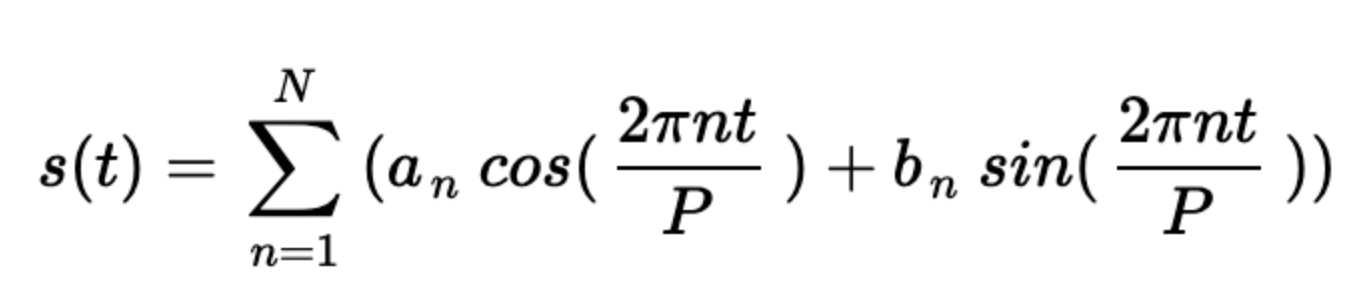

Prophet може автоматски да го открие оптималниот број на термини во серијата, исто така познат како Fourier order. Тој може и рачно да се намести врз основа на потребите на множеството на податоци.

Во основниот модел, Prophet зема β∼Normal(0,σ²) за да направи израмнување пред seasonality.

#### Holiday/Event Function

Оваа функција му овозможува на Facebook Prophet да го прилагоди предвидувањето кога некој празник или настан може да ја промени прогнозата. Потребно е да се направи листа на датумите и кога секој датум е присутен во прогнозата, се додава или одзема вредноста од прогнозата на растот и сезоната врз основа на историските податоци на утврдените датуми. Исто така може и да се земат и низа од денови околу датумите (Пример се датумите помеѓу нова година и божиќ, споени викенди итн.).

За секој празник i, нека Di е збир на минати и идни датуми за тој празник. Потоа додадете функција на индикатор што претставува дали времето t е за време на одмор i, и на секој празник доделете параметар κi што е соодветната промена во прогнозата.

Математички претставено изгледа вака:

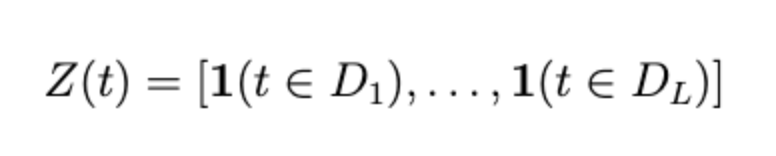

Како и кај сезонската функција, Prophet користи κ∼Normal(0,ν²).

### Примена на Facebook Prophet

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from plotly import tools
import plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import gc

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install prophet

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/BTC-Hourly.csv")

In [ ]:
df.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43312.27,52.056320,2.254677e+06
1,1646089200,2022-02-28 23:00:00,BTC/USD,43085.30,43364.81,42892.37,43178.98,106.816103,4.612210e+06
2,1646085600,2022-02-28 22:00:00,BTC/USD,41657.23,44256.08,41650.29,42907.32,527.540571,2.263535e+07
3,1646082000,2022-02-28 21:00:00,BTC/USD,41917.09,41917.09,41542.60,41659.53,69.751680,2.905822e+06
4,1646078400,2022-02-28 20:00:00,BTC/USD,41361.99,41971.00,41284.11,41914.97,247.151654,1.035935e+07


In [ ]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33259 entries, 0 to 33258
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   unix        33259 non-null  int64         
 1   date        33259 non-null  datetime64[ns]
 2   symbol      33259 non-null  object        
 3   open        33259 non-null  float64       
 4   high        33259 non-null  float64       
 5   low         33259 non-null  float64       
 6   close       33259 non-null  float64       
 7   Volume BTC  33259 non-null  float64       
 8   Volume USD  33259 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 2.3+ MB


In [ ]:
df = df.drop(['unix', 'symbol'], axis=1)

In [ ]:
df['Year'] = df['date'].apply(lambda x: x.year)
df = df[df['Year']>2019]
df.head()

,date,open,high,low,close,Volume BTC,Volume USD,Year
0,2022-03-01 00:00:00,43221.71,43626.49,43185.48,43312.27,52.056320,2.254677e+06,2022
1,2022-02-28 23:00:00,43085.30,43364.81,42892.37,43178.98,106.816103,4.612210e+06,2022
2,2022-02-28 22:00:00,41657.23,44256.08,41650.29,42907.32,527.540571,2.263535e+07,2022
3,2022-02-28 21:00:00,41917.09,41917.09,41542.60,41659.53,69.751680,2.905822e+06,2022
4,2022-02-28 20:00:00,41361.99,41971.00,41284.11,41914.97,247.151654,1.035935e+07,2022


In [ ]:
df = df.set_index('date')

In [ ]:
df.isnull().sum()

symbol        0
open          0
high          0
low           0
close         0
Volume BTC    0
Volume USD    0
Year          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18961 entries, 2022-03-01 00:00:00 to 2020-01-01 00:00:00
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   symbol      18961 non-null  object 
 1   open        18961 non-null  float64
 2   high        18961 non-null  float64
 3   low         18961 non-null  float64
 4   close       18961 non-null  float64
 5   Volume BTC  18961 non-null  float64
 6   Volume USD  18961 non-null  float64
 7   Year        18961 non-null  int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 1.3+ MB


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 0.98, 'Distribution of Close price')

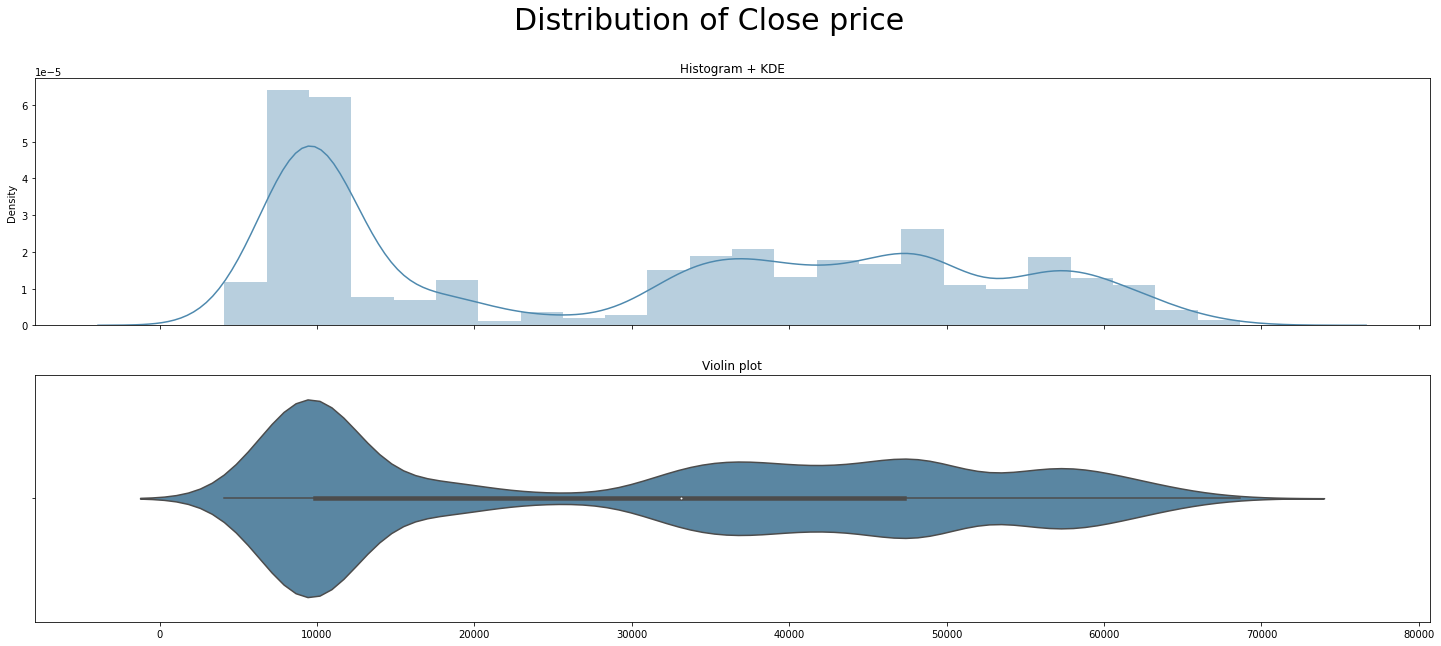

In [ ]:
fig, ax = plt.subplots(2,1,figsize=(25,10),sharex=True)
sns.distplot(df['close'], ax=ax[0],color="#4e89ae")
ax[0].set(xlabel=None)
ax[0].set_title('Histogram + KDE')
sns.violinplot(df['close'], ax=ax[1],color="#4e89ae")
ax[1].set(xlabel=None)
ax[1].set_title('Violin plot')
fig.suptitle("Distribution of Close price", fontsize=30)

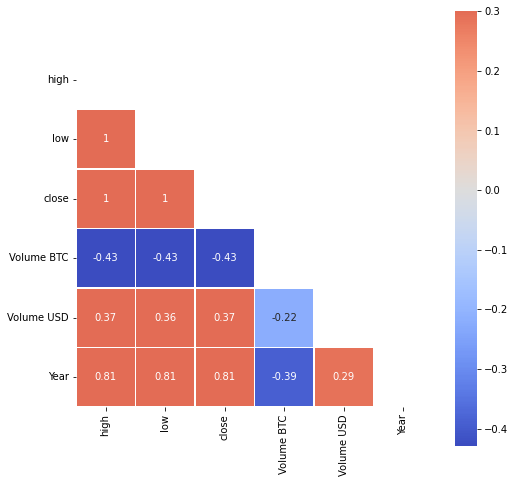

In [ ]:
plt.figure(figsize=(8,8))
corr=df[df.columns[1:]].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(df[df.columns[1:]].corr(), mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5,annot=True)
plt.show()

In [ ]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'Volume BTC', 'Volume USD',
       'Year'],
      dtype='object')

In [ ]:
ma=df[['close']].rolling(window=5).mean()
ma

,close
date,
2022-03-01 00:00:00,NaN
2022-02-28 23:00:00,NaN
2022-02-28 22:00:00,NaN
2022-02-28 21:00:00,NaN
2022-02-28 20:00:00,42594.614
...,...
2020-01-01 04:00:00,7190.166
2020-01-01 03:00:00,7194.626
2020-01-01 02:00:00,7201.436


In [ ]:
df = df.set_index('date')

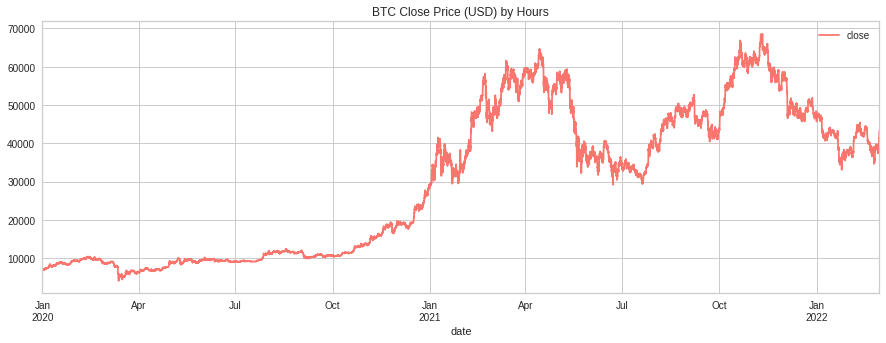

In [ ]:
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
_ = df[['close']].plot(style='', figsize=(15,5), color=color_pal[0], title='BTC Close Price (USD) by Hours')

In [ ]:
split_date = '2021-12-01 00:00:00'
data_train = df.loc[df.index <= split_date].copy()
data_test = df.loc[df.index > split_date].copy()

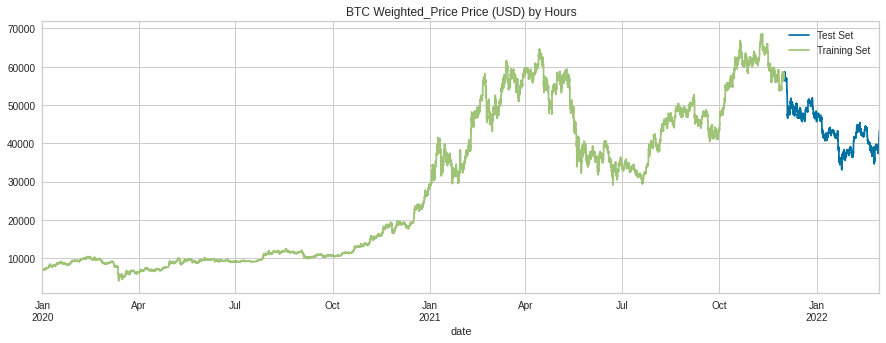

In [ ]:
_ = data_test \
    .rename(columns={'close': 'Test Set'}) \
    .join(data_train.rename(columns={'close': 'Training Set'}), how='outer') \
    .plot(figsize=(15,5), title='BTC Weighted_Price Price (USD) by Hours', style='')

In [ ]:
# Setup and train model
from prophet import Prophet

model = Prophet()
model.fit(data_train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
data_test_fcst = model.predict(df=data_test.reset_index().rename(columns={'date':'ds'}))

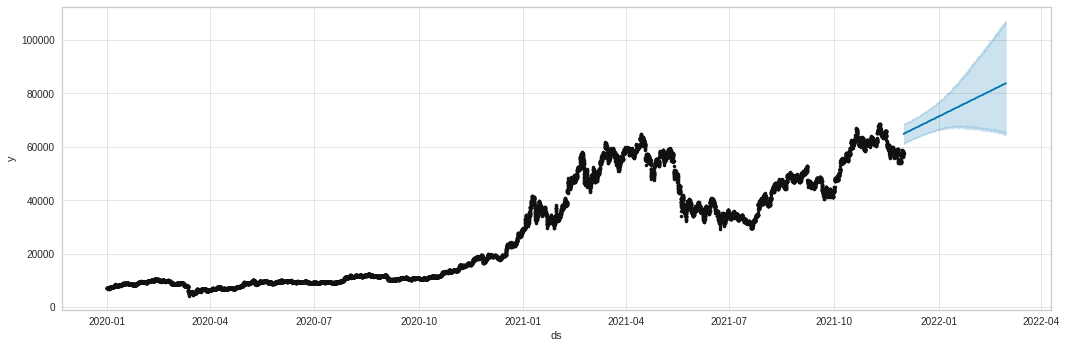

In [ ]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(data_test_fcst, ax=ax)

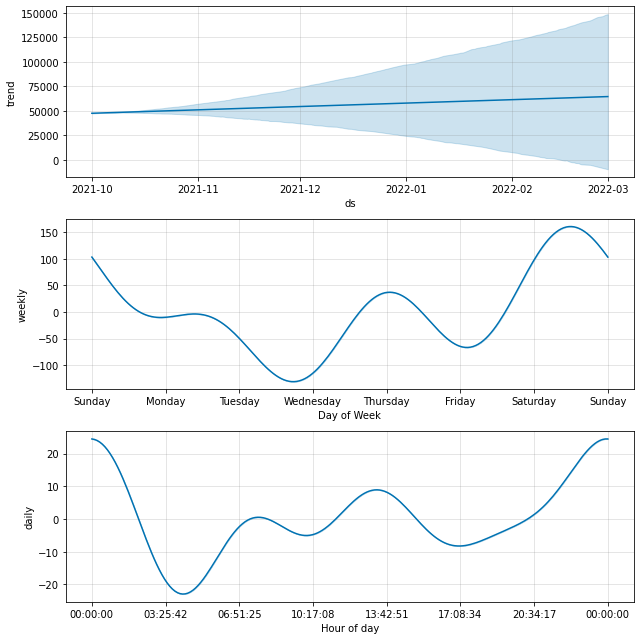

In [ ]:
fig = model.plot_components(data_test_fcst)

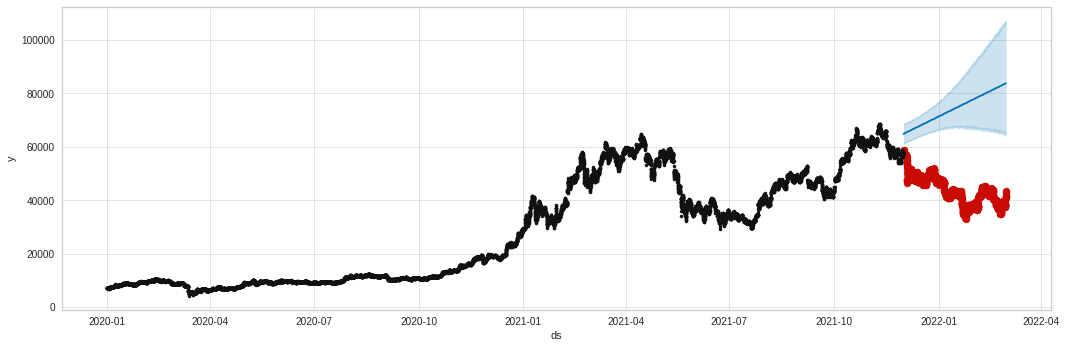

In [ ]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(data_test.index, data_test['close'], color='r')
fig = model.plot(data_test_fcst, ax=ax)

In [ ]:
prophet_model = Prophet(n_changepoints=50, # hyperparameter
                        yearly_seasonality=True,
                        weekly_seasonality=True,
                        daily_seasonality=True,
                       changepoint_prior_scale=1) # hyperparameter

In [ ]:
prophet_model.fit(data_train)

In [ ]:
data_test2 = prophet_model.predict(df=data_test.reset_index().rename(columns={'date':'ds'}))

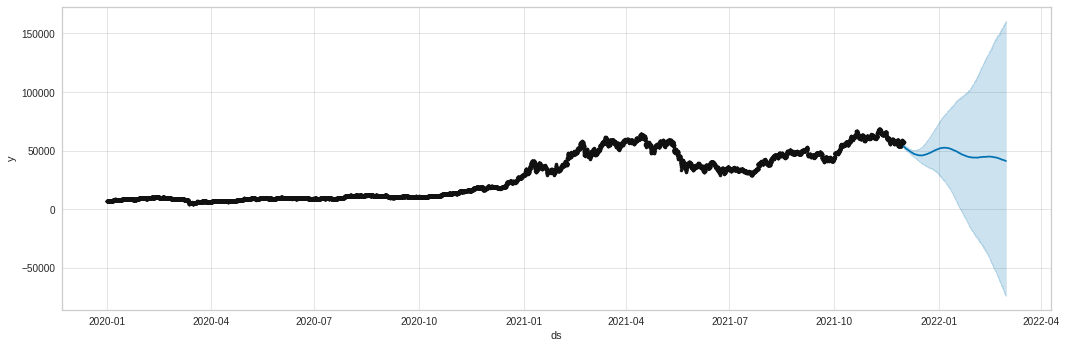

In [ ]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = prophet_model.plot(data_test2, ax=ax)

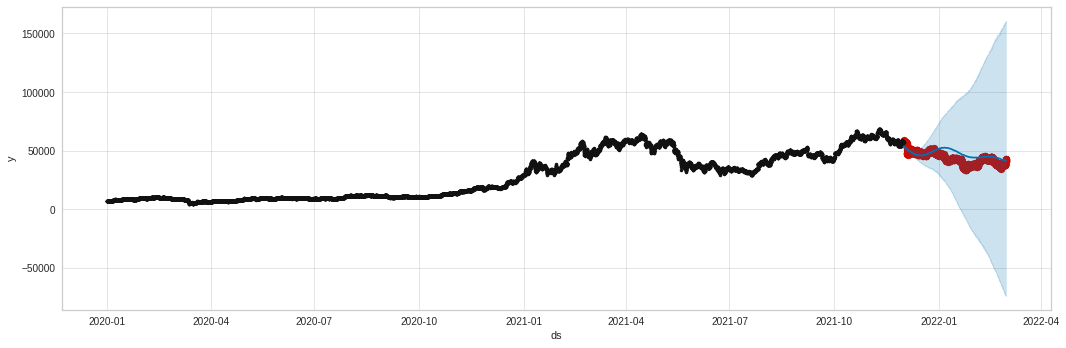

In [ ]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(data_test.index, data_test['close'], color='r')
fig = prophet_model.plot(data_test2, ax=ax)

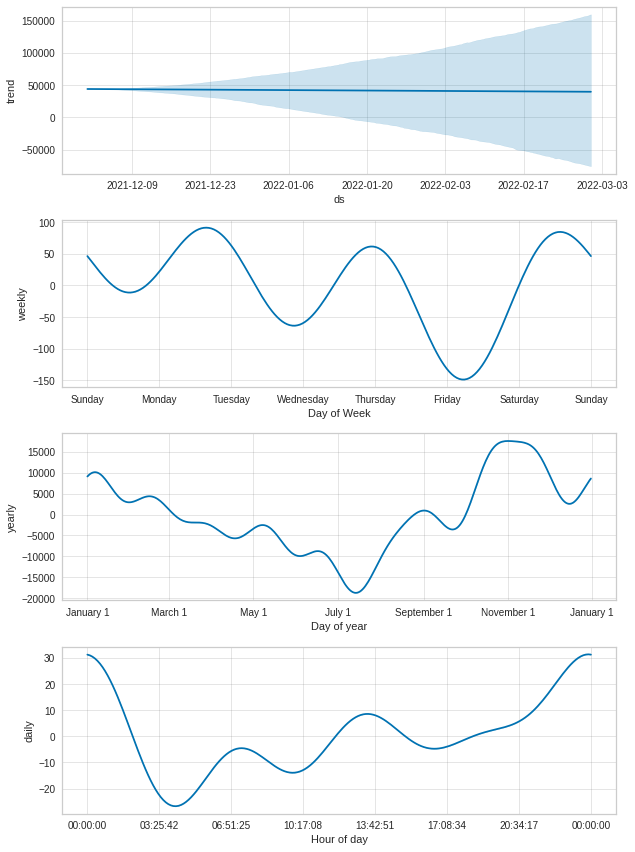

In [ ]:
fig = prophet_model.plot_components(data_test2)

In [ ]:
data_train = data_train.reset_index().rename(columns={'date':'ds', 'close':'y'})

In [ ]:
# Data preprocess
training_set = data_train.values
training_set = np.reshape(training_set, (len(training_set), 1))
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))

In [ ]:
data_train = data_train[['close']]
data_train.head()

data_test = data_test[['close']]
data_test.head()

,close
date,
2022-03-01 00:00:00,43312.27
2022-02-28 23:00:00,43178.98
2022-02-28 22:00:00,42907.32
2022-02-28 21:00:00,41659.53
2022-02-28 20:00:00,41914.97





#Neural Prophet
***

## Преглед

Neural Prophet, следен чекор во еволуцијата на Prophet алгоритамот креиран од
страна на Facebook, претставува алгоритам за предвидување на временски серии.

Поголем дел од проблемите поврзани со временските серии побаруваат предвидувања кои се лесно разбирливи. Истовремено, се побарува и ефикасно предвидување. Овие две побарувања бараат компромис помеѓу: **интерпретирањето** наспроти **перформанси**. 

Постојат две класи на модели:


1.   Statistical Algorithms (ARIMA, GARCH …) кои се објаснуваат математички со знаењето на теоријата
2.   Neural Network Models кои се повеќе конплексни и тешко објасливи но покажуваат повеќе перформанси


## Настанување

Оригиналната цел на Facebook со Prophet била да понуди леснa, работлива, сфатлива и костуматизирачка алатка која можела да прави предвидувања со временски серии. Но, имало еден проблем: **лоши перформанси**.

За решавање на овој проблем, се појавил NeuralProphet. Односно
`NeuralProphet = Neural Networks + Prophet`.

Со ова намерата била да се комбинираат две претходни класи со вклучување на невронските мрежи во Prophet (a statistical algorithm). Целта била: **добивање во ефикасност додека истовремено лимитирање на губитокот во интерпретабилноста**.


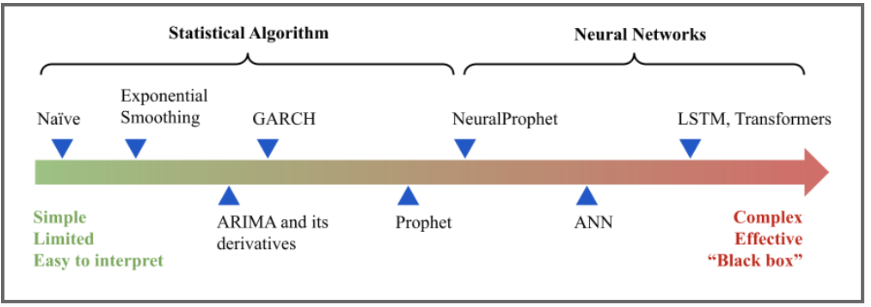

## Моделот

NeuralProphet моделот предвидува број на временски чекори, h во иднината каде што h се нарекува “**хоризонт**”.

`Јадрен концепт на NeuralProphet моделот е неговата композитност!`

По сетирањето на наменетата вредност на h, секој нареден чекор до h се предвидува базирано на следнава врска:

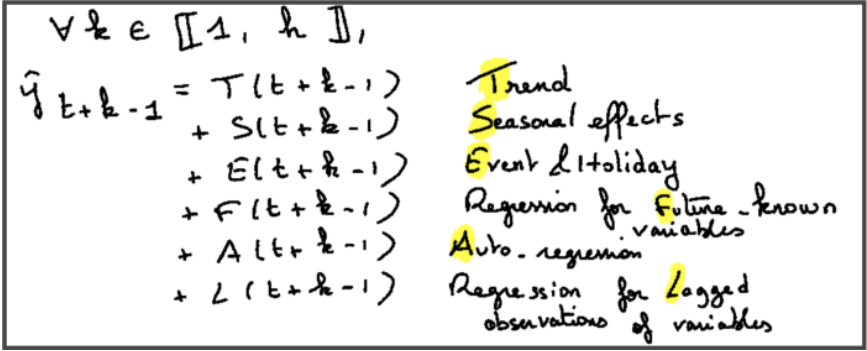

Со ова, на пример, еден чекор нанапред во предвидувањето е еквивалентно со пишување на претходната врска со h = 1:

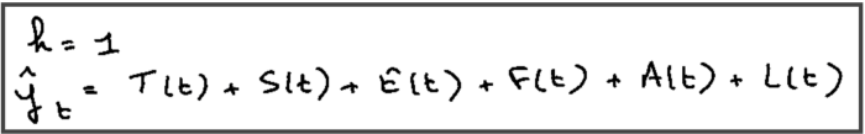


Вкупно 6 специфични модули се споени заедно за да се креира NeuralProphet. Тренирањето го принудува секој модул да се насочи на соодветно предвидување се со цел да го минимизира целосното губење.

### Trend

Трендот се заманива со целосната варијација на сигналот а не сo малите фруктрации во сигналот. 
NeuralProphet учи да ги детектира датумите каде се случува јасната варијација во трендот. Овие точки се нарекуват **точки на промена** и помеѓу секоја од нив трендот треба да биде линеарен.

Проблемот е сличен со линеарниот мулти регресор каде линеарната регресија се пресметува помеѓу две точки на промена.

Овие точки се инициализираат униформно по временската оска. Потоа, чинењето на секоја линеарка регресија се додава во целосната загуба на моделот.

Градиентот десцентот ја минимализира загубата и последователно ја подобрува регресијата. Посебно, параметарот оптимизиран од линерната регресија е slope кој се нарекува **вредност на раст**.


Дополнително, L1 регресија се перформира за да се отстранат непотребните точки на промена. Дополнителни точки на промена можат да бидат додадени мануелно.

Во процесот на тестирање, трендот е ектраполитација од последната линеарна регресија каде што 10% од податоците (параметризираните) се оставаат на крајот за да се осигура конзистентен финален тренд.

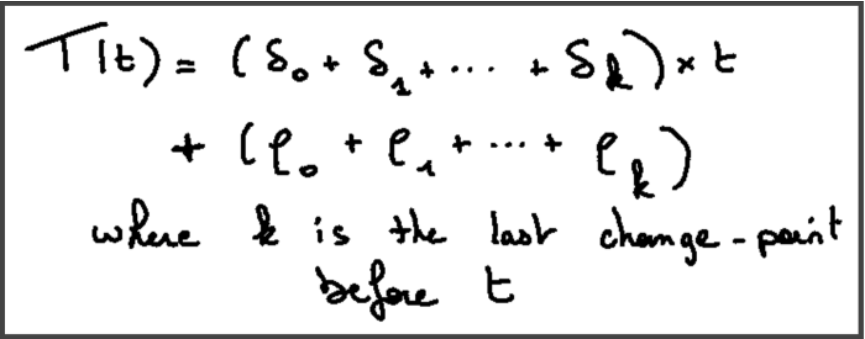

Интерцептот не е тренирачки параметар меѓутоа зависи од ратата на растење за да осигура контиунитет. Ова визуелно е еднакво на:

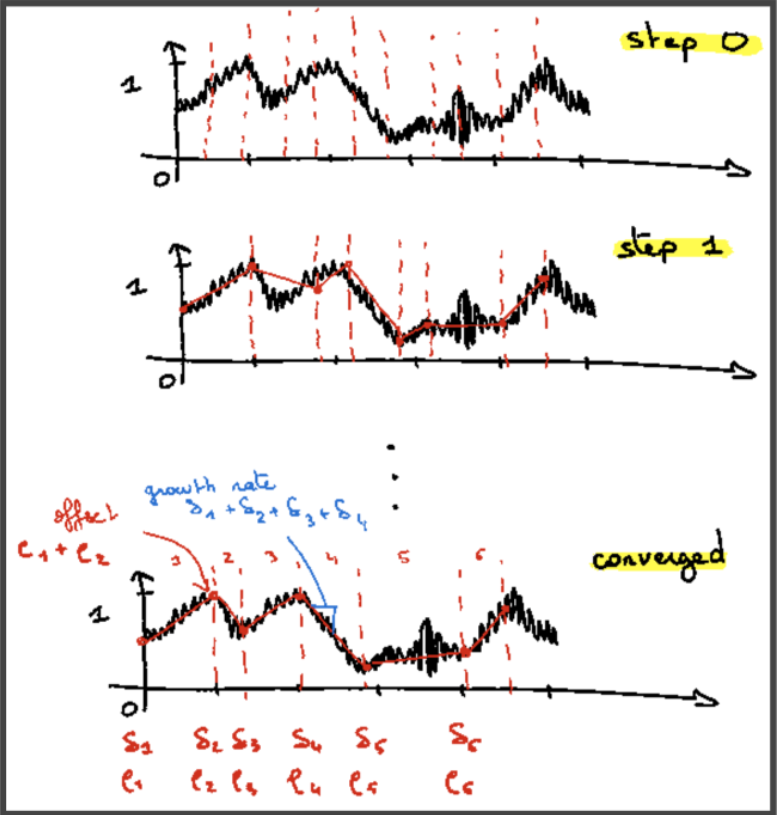

Предвидувањата ќе бидат плотнати по преглед на следниот модул: ***Seasonality***

### Seasonality

Seasonality на временските серии претставува **периодично движење** на сигналите поради нивната природа.
Пример: Температурата се одликува со дневна seasonality заради патернот кој се повторува секој ден - навечер е поладно него во текот на денот. Температурата следи и годишна seasonality - поладно е во зима него во лето итн.

На овој моделот на seasonality, NeuralProphet претпоставува дека таргетот е **периоднична и континуирана функција** и последователно може да се искаже како Фориерови серии.
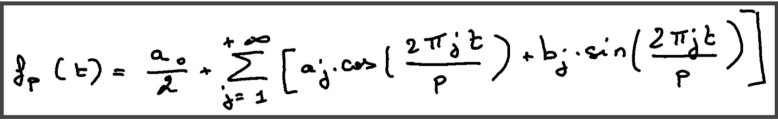

Две забелешки од формулата погоре:


1.   Константниот дел пред сумата (познат како офсет) може да биде непотребен за NeuralProphet бидејќи трендот го разгледува имплицитно.
2.   Пресметувањето на бесконечни броеви а и b е недостигливо. Според ова, само првите к делови (оние со к параметар) се пресметуват.


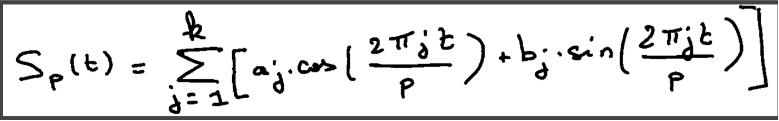



Целта на моделот е да се најде 2*к параметри кои најдобро се вклопуваат со таргетот. Стандардно, 3 периоди се активираат:


*   Дневно со p = 1
*   Неделно со p = 7
*   Годишно со p = 365,25

За секој од овие периоди соодветно и к се менува: к = 6, к = 3 и к = 6 (Периодот се активира ако таргетот покрива барем 2 пати од вредноста на периодот.)

Параметрите се пресметуваат со додавање на **cost** поврзано со разликата помеѓу моделираната seasonality и вистинската таргет вредност.
seasonality се множи со трендот ако аргументот “multiplicative” се специфицира.

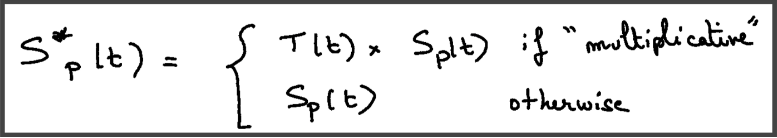





Ако само 6 месеци на податоци се достапни, не се активира годишниот период(сепак постои опција за форсирање). Но, другите периоди можат рачно да бидат додадени зависно од типот на податоците. (p = 30 ако е месечно)

### Auto-Regression

Auto-Regression (АR) процесот е веројатно најкористениот процес во временските серии за да се одлика **зависноста помеѓу случајните променливи во сериите.**

Со p број на претходни вредности вклучени, AR процесот се дефинира како:
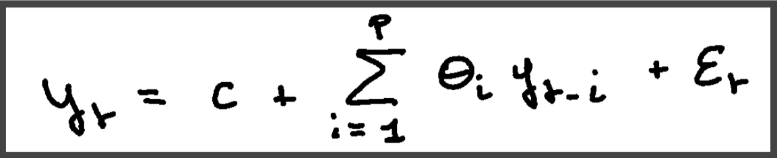

White noise e **stochastic process** и мора да повторува 3 категории кои се:
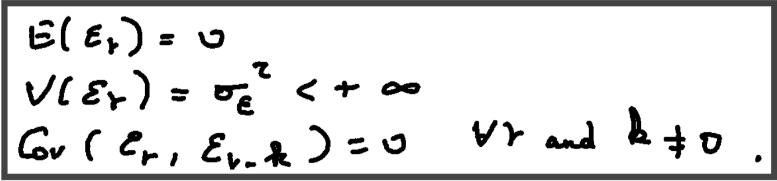

White noise преставува **јадрен концепт на декомпозицијата што е клучна теорема на теоријата на временските серии.**

АR процесот може да предвиди **еден чекор во иднината.** Ако се дадени p изминати вредности на таргетот, времето t се предвидува. Според ова, ако имаме h > 1 потребни ни се h различни модели. Со AR-Net моделот избран од NeuralProphet овој проблем се надминува.

Со користење на време t како forecast origin (првите чекори предвидени), претходните р вредности ги предвидуваат наредните h вредности.

“Forecast origin” e значаен бидејќи за дадени временски чекори потребни за предвидување, различни forecast origins постојат.

Пример, ако h = 3 (сакаме да предвидиме 3 временски чекори во иднината), предвидување на t = 5000 ќе добиеме 3 различни origins: t = 4998, 4999 и 5000.
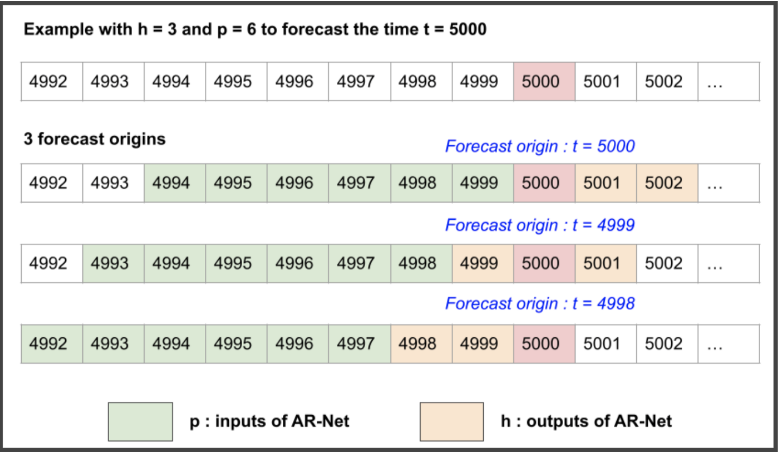

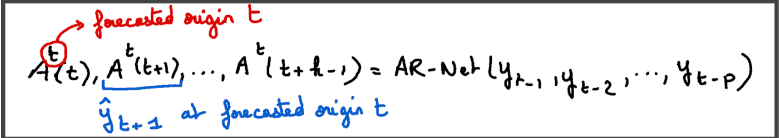

`Како го бираме р?` Параметарот треба да се избере според приближбата должина на релевантниот контекст во претходните обзервации. Во практика, тешко е да се детерминира точно и често се поставува како двојна највнатрешна периодичност или два пати предвидениот хоризонт.

`Која невронска мрежна архитектура се користи во AR-Net?` Невронската мрежа користи наједноста архитектура: без intermediate layer, без активирачка функција, само р вллезови поврзани со h i излези:
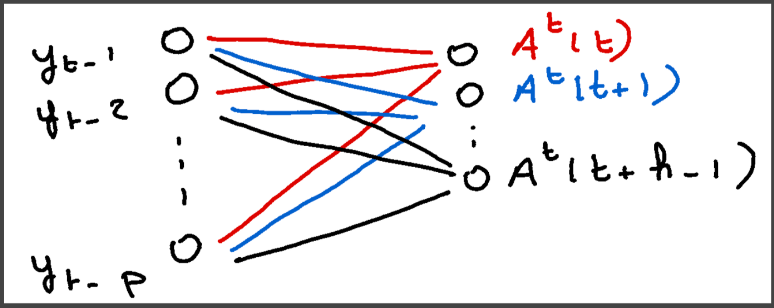



NeuralProphet e наменет да биде едноставен и како што е горе дефинирано, можно е да се интерпретира неговата архитектура со анализирањето на вредностите на тежините.



### Lagged Regressors

До овдека, главните концепти на NeuralProphet беа наведени.

**Lagged regressors** се нешто што претходно ги дефиниравме како обзервирани варијабли - температурата. Можеби е релевантно да вклучиме информации во целосниот модел надевајќи се на подобри резултати.

Обзервираните варијабли се поврзуваат со NeuralProphet моделот преку AR-Net!

Секој lagged regressor е асоциран со уникатна AR-Net. Параметрите притоа **параметрите не се споделуваат.** Според ова, зависноста помеѓу обзервираните варијабли не се целосно зимаат во предвит.

### Future Regressors

Future Regressors се варијабли кои се познати во иднина. Во секој временски чекор t **вредноста на ваквите варијабли е позната**.


### Event & Holiday

Последниот модул вклучува **настани кои се случуваат понекогаш и имаат ефект врз таргетот.** Настанот е бинарна временска серија еднаква на 1 во време t ако настанот се случи (0 во другиот случај). 

## Примена на Neural Prophet

In [ ]:
from neuralprophet import NeuralProphet

In [ ]:
pip install neuralprophet

In [ ]:
df = df.reset_index().rename(columns={'date':'ds', 'close':'y'})

In [ ]:
df = df[['ds', 'y']]
df.head()

,ds,y
0,2022-03-01 00:00:00,43312.27
1,2022-02-28 23:00:00,43178.98
2,2022-02-28 22:00:00,42907.32
3,2022-02-28 21:00:00,41659.53
4,2022-02-28 20:00:00,41914.97


In [ ]:
m1 = NeuralProphet()
df_train, df_test = m1.split_df(df, freq='H', valid_p = 1.0/12)

metrics = m1.fit(df, freq='H', validation_df=df_test, progress='plot')

INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.995% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.995% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 48


  0%|          | 0/313 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.30E-01, min: 1.09E+00


  0%|          | 0/313 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.49E-01, min: 1.33E+00


  0%|          | 0/313 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.30E-01, min: 1.43E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.36E-01
WARNING - (NP.forecaster._train) - To plot live loss, please install neuralprophet[live].Using pip: 'pip install neuralprophet[live]'Or install the missing package manually: 'pip install livelossplot'
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/neuralprophet/forecaster.py", line 1441, in _train
    from livelossplot import PlotLosses
ModuleNotFoundError: No module named 'livelossplot'
Epoch[48/48]: 100%|██████████| 48/48 [00:36<00:00,  1.32it/s, SmoothL1Loss=0.00105, MAE=1.94e+3, RMSE=2.54e+3, RegLoss=0, MAE_val=2.05e+3, RMSE_val=2.48e+3, SmoothL1Loss_val=0.000989]


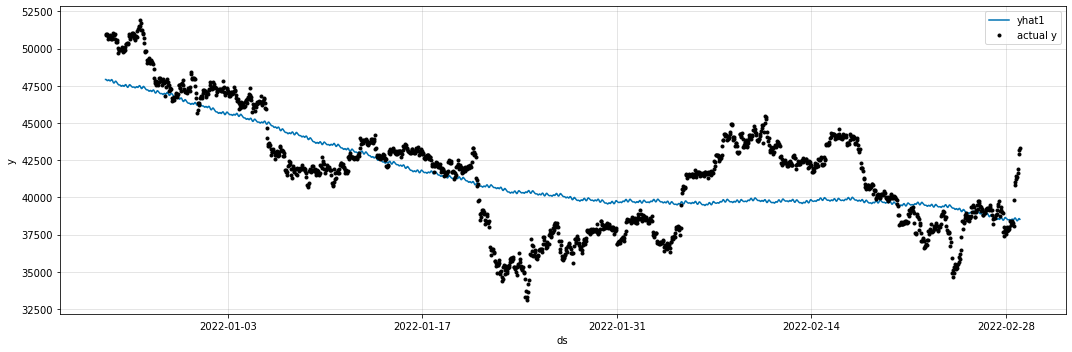

In [ ]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = m1.plot(asd, ax=ax)

In [ ]:
metrics.tail()

,SmoothL1Loss,MAE,RMSE,RegLoss,SmoothL1Loss_val,MAE_val,RMSE_val
43,0.001196,2103.609500,2713.473662,0.0,0.001240,2235.631570,2737.188714
44,0.001136,2036.228347,2647.010965,0.0,0.001077,2090.039620,2591.295574
45,0.001097,1994.905898,2600.848892,0.0,0.001035,2041.396787,2539.769889
46,0.001063,1955.021116,2558.261914,0.0,0.000989,2050.906634,2454.944835
47,0.001047,1941.773228,2540.099169,0.0,0.000989,2054.004807,2475.390762


In [ ]:
m = NeuralProphet(
    n_changepoints=50,
    weekly_seasonality=6,
    daily_seasonality=10,
    trend_reg=1,
    learning_rate=0.01,
)
df_train, df_test = m.split_df(df, freq='H', valid_p = 1.0/12)

metrics = m.fit(df, freq='H', validation_df=df_test, progress='plot')

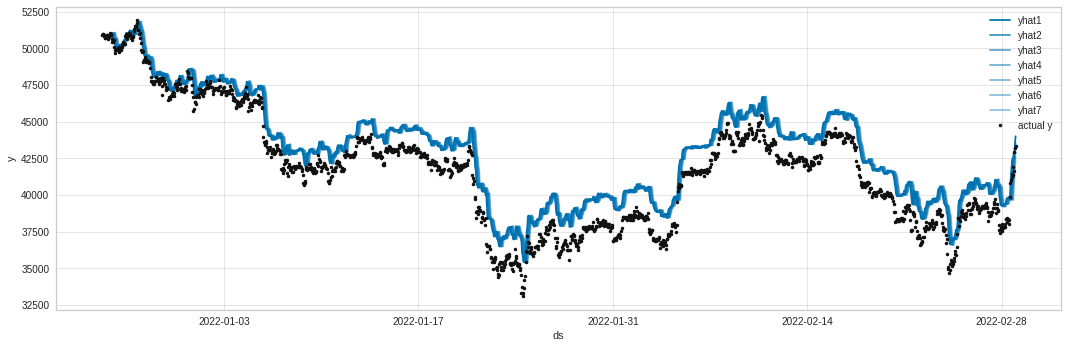

In [ ]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = m.plot(asd, ax=ax)

In [ ]:
m3 = NeuralProphet(
    n_changepoints=100,
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    seasonality_mode="multiplicative",
    n_forecasts=7,
    n_lags=7,
    num_hidden_layers=2,
    learning_rate=0.1,
)
df_train1, df_test1 = m3.split_df(df, freq='H', valid_p = 1.0/12)

metrics_3 = m3.fit(df, freq='H', validation_df=df_test1, progress='plot')

INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.995% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.995% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 48
WARNING - (NP.forecaster._train) - To plot live loss, please install neuralprophet[live].Using pip: 'pip install neuralprophet[live]'Or install the missing package manually: 'pip install livelossplot'
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/neuralprophet/forecaster.py", line 1441, in _train
    from livelossplot import PlotLosses
ModuleNotFo

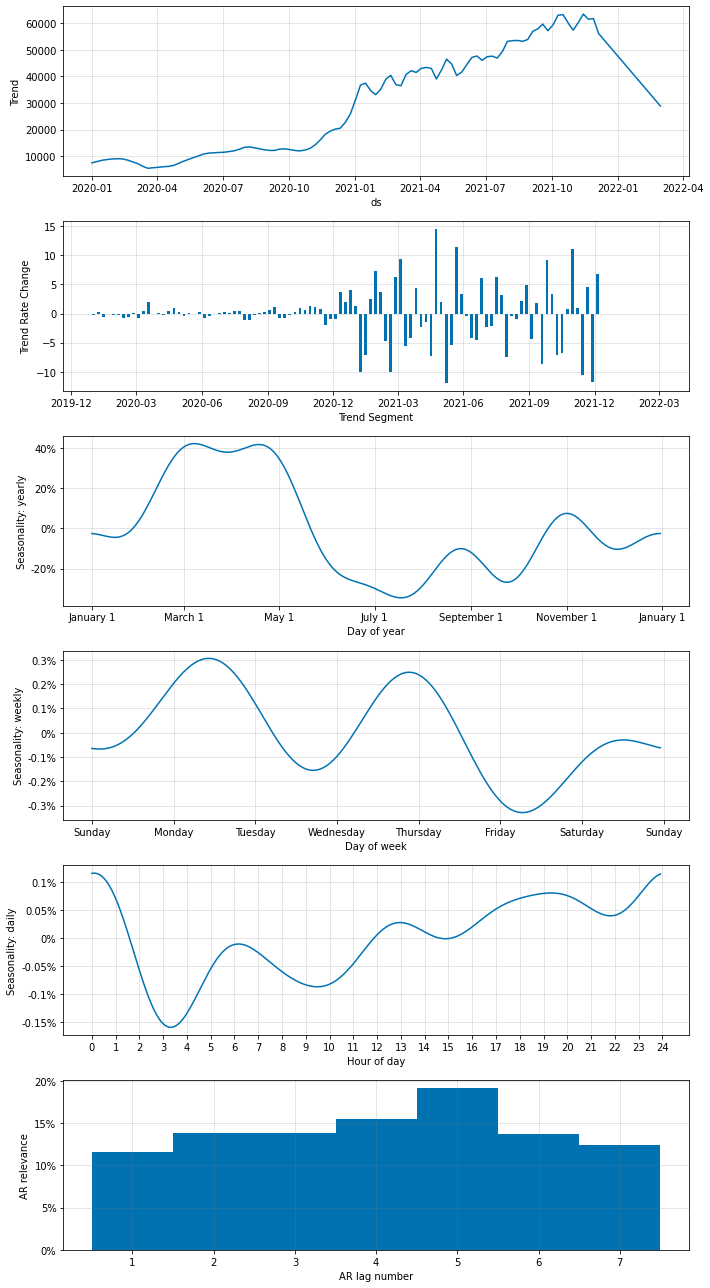

In [ ]:
fig_param = m3.plot_parameters()

In [ ]:
asd['yhat_avg'] = asd[['yhat1', 'yhat2', 'yhat3', 'yhat4', 'yhat5', 'yhat6', 'yhat7']].mean(axis=1)

In [ ]:
asd.tail()

,ds,y,yhat1,residual1,yhat2,residual2,yhat3,residual3,yhat4,residual4,...,ar3,ar4,ar5,ar6,ar7,trend,season_yearly,season_weekly,season_daily,yhat_avg
1575,2022-02-28 20:00:00,41914.97,40737.1875,-1177.7825,40683.402344,-1231.567656,40409.226562,-1505.743438,40034.734375,-1880.235625,...,-21045.697266,-21420.183594,-21993.755859,-22750.302734,-23376.238281,56840.460938,0.087481,0.000153,-0.00012,39729.858817
1576,2022-02-28 21:00:00,41659.53,40879.320312,-780.209687,40738.199219,-921.330781,40687.628906,-971.901094,40412.878906,-1246.651094,...,-20767.175781,-21041.927734,-21417.880859,-21990.613281,-22746.244141,56836.792969,0.087468,0.000083,0.000036,40132.529576
1577,2022-02-28 22:00:00,42907.32,40956.414062,-1950.905937,40876.691406,-2030.628594,40738.777344,-2168.542656,40687.601562,-2219.718437,...,-20712.277344,-20763.457031,-21039.664062,-21414.820312,-21986.689453,56833.117188,0.087455,0.000013,0.000124,40453.068080
1578,2022-02-28 23:00:00,43178.98,41388.339844,-1790.640156,40954.480469,-2224.499531,40877.9375,-2301.0425,40739.4375,-2439.5425,...,-20570.068359,-20708.568359,-20761.224609,-21036.65625,-21410.998047,56829.449219,0.087442,-0.000057,0.000224,40727.903460
1579,2022-03-01 00:00:00,43312.27,41791.847656,-1520.422344,41388.097656,-1924.172344,40957.425781,-2354.844219,40880.285156,-2431.984844,...,-20489.244141,-20566.382812,-20706.339844,-20758.255859,-21032.902344,56825.777344,0.087428,-0.000125,0.000356,40980.023996


In [ ]:
df_test

,ds,y
0,2021-12-25 05:00:00,50924.13
1,2021-12-25 06:00:00,50997.52
2,2021-12-25 07:00:00,50966.97
3,2021-12-25 08:00:00,50907.26
4,2021-12-25 09:00:00,50843.64
...,...,...
1575,2022-02-28 20:00:00,41914.97
1576,2022-02-28 21:00:00,41659.53
1577,2022-02-28 22:00:00,42907.32
1578,2022-02-28 23:00:00,43178.98


In [ ]:
forecast_3 = m3.predict(df=df_test)

INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.937% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.937% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H


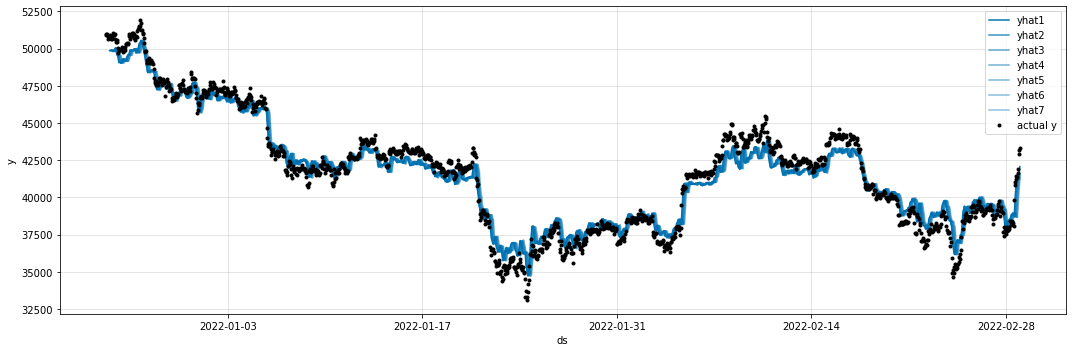

In [ ]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = m3.plot(forecast_3, ax=ax)

In [ ]:
metrics_3.tail()

,SmoothL1Loss,MAE,RMSE,RegLoss,SmoothL1Loss_val,MAE_val,RMSE_val
43,0.000089,527.178957,739.616766,0.0,0.000127,705.460680,884.508475
44,0.000082,491.859497,707.185837,0.0,0.000133,717.932470,898.723797
45,0.000076,467.181151,684.033853,0.0,0.000126,708.650943,879.291176
46,0.000072,443.246926,665.548553,0.0,0.000124,704.221840,872.807271
47,0.000070,425.143750,654.467364,0.0,0.000122,699.135755,864.874039


In [ ]:
metrics_3.MAE.min()

425.143749859556

# ML Models
***

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [ ]:
# define regression function
def regression(X_train, X_test, y_train, y_test):
    Regressor = {
        'Random Forest Regressor': RandomForestRegressor(n_estimators=200),
        'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=500),
        'ExtraTrees Regressor': ExtraTreesRegressor(n_estimators=500, min_samples_split=5),
    }

    for name, clf in Regressor.items():
        print(name)
        clf.fit(X_train, y_train)
    
        print(f'R2: {r2_score(y_test, clf.predict(X_test)):.2f}')
        print(f'MAE: {mean_absolute_error(y_test, clf.predict(X_test)):.2f}')
        print(f'RMSE: {math.sqrt(mean_squared_error(y_test, clf.predict(X_test))):.2f}')
        print()

In [ ]:
df2 = pd.read_csv("/content/drive/MyDrive/BTC-Hourly.csv")

In [ ]:
df2['date'] = pd.to_datetime(df2['date'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33259 entries, 0 to 33258
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   unix        33259 non-null  int64         
 1   date        33259 non-null  datetime64[ns]
 2   symbol      33259 non-null  object        
 3   open        33259 non-null  float64       
 4   high        33259 non-null  float64       
 5   low         33259 non-null  float64       
 6   close       33259 non-null  float64       
 7   Volume BTC  33259 non-null  float64       
 8   Volume USD  33259 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 2.3+ MB


In [ ]:
df2['Year'] = df2['date'].apply(lambda x: x.year)
df2 = df2[df2['Year']>2019]
df2.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD,Year
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43312.27,52.056320,2.254677e+06,2022
1,1646089200,2022-02-28 23:00:00,BTC/USD,43085.30,43364.81,42892.37,43178.98,106.816103,4.612210e+06,2022
2,1646085600,2022-02-28 22:00:00,BTC/USD,41657.23,44256.08,41650.29,42907.32,527.540571,2.263535e+07,2022
3,1646082000,2022-02-28 21:00:00,BTC/USD,41917.09,41917.09,41542.60,41659.53,69.751680,2.905822e+06,2022
4,1646078400,2022-02-28 20:00:00,BTC/USD,41361.99,41971.00,41284.11,41914.97,247.151654,1.035935e+07,2022


In [ ]:
df2 = df2.resample('24H', on = 'date').mean()

In [ ]:
df2['daily_avg'] = (df2['open'] + df2['high'] + df2['low'] + df2['close']) / 4

In [ ]:
df2['daily_avg_After_Month']=df2['daily_avg'].shift(-30)
X_BTC = df2.dropna().drop(['daily_avg_After_Month','daily_avg'], axis=1)
y_BTC = df2.dropna()['daily_avg_After_Month']
X_train_BTC, X_test_BTC, y_train_BTC, y_test_BTC = train_test_split(X_BTC, y_BTC, test_size=0.2, random_state=43)
X_forecast_BTC =  df2.tail(30).drop(['daily_avg_After_Month','daily_avg'], axis=1)

In [ ]:
print('Bitcoin (BTC):')
regression(X_train_BTC, X_test_BTC, y_train_BTC, y_test_BTC)

Bitcoin (BTC):
Random Forest Regressor
R2: 0.99
MAE: 1002.30
MSE: 1640.76

Gradient Boosting Regressor
R2: 0.99
MAE: 898.56
MSE: 1424.43

ExtraTrees Regressor
R2: 0.99
MAE: 1287.92
MSE: 2072.10



# Референци
Neural prophet documentation  https://neuralprophet.com/html/contents.html

Facebook prophet documentation https://facebook.github.io/prophet/docs/quick_start.html